<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/Complementaria/Complementaria_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Complementaria métodos computacionales 1
>
> Semana 06

***

La función gaussiana de media $\mu$ y desviación estándar $\sigma$ viene dada por:

$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac12 \left(\frac{x-\mu}{\sigma}\right)^2\right)  
$$

y sea su integral incompleta dada por

$$
g(a;\mu,\sigma) = \int_{-\infty}^{a} f(x;\mu,\sigma) \,\mathrm{d}x
$$

# 1) Cuadratura de Laguerre

**1.0pt**
Defina una función que calcule la función $g$. Use los coeficientes dados por `np.polynomial.laguerre.laggauss` para realizar la integración, con la transformación adecuada de coordenadas.

Para probar su código, $g(0.1,0.2,0.3) \approx 0.369441$

**1.0pt**
Haga lo mismo con la cuadratura de Legendre, usando la propiedad de que la integral completa $g(\infty;\mu,\sigma)=1$. Los resultados deberían ser equivalentes.

In [43]:
import numpy as np



def integral_incompleta(a, mu, sigma,n_points=10):
    nodes, weights = np.polynomial.laguerre.laggauss(n_points)
    def gaussiana(x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    def integrand(t):
        x = (a - t)
        return gaussiana(x, mu, sigma)*np.exp(x)


    integral = np.sum(weights * integrand(nodes))

    return integral



g = integral_incompleta(0.1, 0.2, 0.3)
print(f'El valor de la integral incompleta es: {g}')



El valor de la integral incompleta es: 0.2947001051570876


In [25]:
import numpy as np
from scipy.special import roots_legendre

def integral_incompleta_legendre(a, mu, sigma, n_points=100):
    # Coeficientes de los nodos y pesos de Legendre
    nodes, weights = roots_legendre(n_points)

    # Función gaussiana
    def gaussiana(x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    # Transformación para la cuadratura de Legendre
    def integrand(t):
        # Transformar el intervalo [-1, 1] a (-∞, a]
        x = mu + sigma * np.sqrt(2) * (t + 1) / 2
        return gaussiana(x, mu, sigma) * (sigma * np.sqrt(2) / 2)

    # Aplicar la cuadratura de Legendre
    integral = np.sum(weights * integrand(nodes))

    return integral

# Probar la función con los valores dados
g_legendre = integral_incompleta_legendre(0.1, 0.2, 0.3)
print(f'El valor de la integral incompleta usando Legendre es: {g_legendre}')


El valor de la integral incompleta usando Legendre es: 0.42135039647485756


**0.5pt**: Grafique $g(a;0,\sigma)$ vs $a$, para $a\in[-5,5]$ y varios sigmas $\sigma\in[0.1,5]$, identificando cada curva con un color que represente el valor de $\sigma$. Ponga una barra de color como leyenda.

<ipython-input-26-f8871e439bdf>:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='σ')


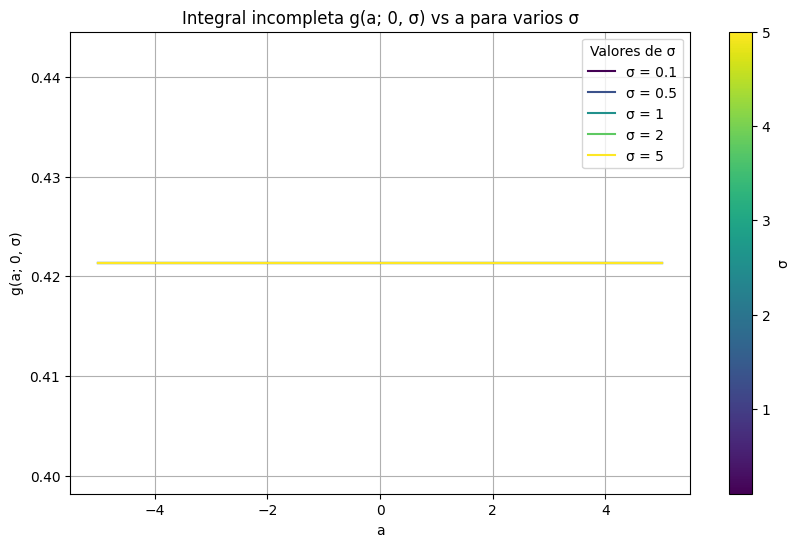

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

# Función para calcular la integral incompleta usando la cuadratura de Legendre
def integral_incompleta_legendre(a, mu, sigma, n_points=100):
    # Coeficientes de los nodos y pesos de Legendre
    nodes, weights = roots_legendre(n_points)

    # Función gaussiana
    def gaussiana(x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    # Transformación para la cuadratura de Legendre
    def integrand(t):
        # Transformar el intervalo [-1, 1] a (-∞, a]
        x = mu + sigma * np.sqrt(2) * (t + 1) / 2
        return gaussiana(x, mu, sigma) * (sigma * np.sqrt(2) / 2)

    # Aplicar la cuadratura de Legendre
    integral = np.sum(weights * integrand(nodes))

    return integral

# Parámetros
a_values = np.linspace(-5, 5, 500)
sigma_values = [0.1, 0.5, 1, 2, 5]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Colores para la leyenda
colors = plt.cm.viridis(np.linspace(0, 1, len(sigma_values)))

for sigma, color in zip(sigma_values, colors):
    g_values = [integral_incompleta_legendre(a, 0, sigma) for a in a_values]
    plt.plot(a_values, g_values, color=color, label=f'σ = {sigma}')

# Añadir la barra de color
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(sigma_values), vmax=max(sigma_values)))
sm.set_array([])
plt.colorbar(sm, label='σ')

# Etiquetas y título
plt.xlabel('a')
plt.ylabel('g(a; 0, σ)')
plt.title('Integral incompleta g(a; 0, σ) vs a para varios σ')
plt.legend(title='Valores de σ')
plt.grid(True)
plt.show()


# 2) Otros métodos

Integre, con $\sigma=1$,

$$
H = \int_{- \sigma}^{ \sigma} f(x;0,\sigma) \mathrm{d}x
$$
usando trapezoide y Simpson, para una cantidad fija de puntos $n$.

Exprese este número $H$ en términos de su función $g$. Compare el resultado de trapezoide y Simpson para varios $n$ y comente el comportamiento que observa.

In [ ]:
import numpy as np
from scipy.integrate import simps, trapz


def gaussiana(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


def g(a, mu, sigma):
    from scipy.special import erf
    return 0.5 * (1 + erf((a - mu) / (np.sqrt(2) * sigma)))


sigma = 1
mu = 0
a = sigma
b = -sigma


def trapezoide_integration(n, mu, sigma):
    x = np.linspace(b, a, n)
    y = gaussiana(x, mu, sigma)
    return trapz(y, x)

def simpson_integration(n, mu, sigma):
    x = np.linspace(b, a, n)
    y = gaussiana(x, mu, sigma)
    return simps(y, x)


H_g = g(sigma, mu, sigma) - g(-sigma, mu, sigma)


n_values = [10, 50, 100, 500, 1000]
results_trapz = []
results_simps = []

for n in n_values:
    H_trapz = trapezoide_integration(n, mu, sigma)
    H_simps = simpson_integration(n, mu, sigma)

    results_trapz.append(H_trapz)
    results_simps.append(H_simps)

    print(f"n = {n}")
    print(f"Método de Trapecio: {H_trapz:.6f}")
    print(f"Método de Simpson: {H_simps:.6f}")
    print(f"g(a) - g(-a): {H_g:.6f}")
    print("---")




n = 10
Método de Trapecio: 0.680695
Método de Simpson: 0.682759
g(a) - g(-a): 0.682689
---
n = 50
Método de Trapecio: 0.682622
Método de Simpson: 0.682690
g(a) - g(-a): 0.682689
---
n = 100
Método de Trapecio: 0.682673
Método de Simpson: 0.682689
g(a) - g(-a): 0.682689
---
n = 500
Método de Trapecio: 0.682689
Método de Simpson: 0.682689
g(a) - g(-a): 0.682689
---
n = 1000
Método de Trapecio: 0.682689
Método de Simpson: 0.682689
g(a) - g(-a): 0.682689
---


<ipython-input-9-c6dc2317962e>:23: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  return trapz(y, x)
<ipython-input-9-c6dc2317962e>:28: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return simps(y, x)


# 3) Intervalos de confianza

Defina una función "cumulant_function" que dado $p$, usando el método de Newton, con las funciones de los puntos anteriores, encuentre $\beta$ tal que

$$
p = \int_{-\beta \sigma}^{\beta \sigma } f(x;0,\sigma) \mathrm{d}x
$$

De nuevo, para $\sigma=1$.

Grafique $\beta$ como función de $p\in(0,1)$